**Clustering**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [2]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

**K means**

In [3]:
import random

def initialize_centroids(data, k):
    """Randomly initialize the centroids from the data points."""
    centroids_idx = np.random.choice(len(data), k, replace=False)
    centroids = data[centroids_idx]
    return centroids

def compute_distances(data, centroids):
    """Compute the distances between each data point and centroids.""" 
    return np.sqrt(np.sum((data-centroids[:,np.newaxis])**2,axis=2))



In [4]:
def assign_clusters(distances):
    """Assign each data point to the closest centroid."""
    return np.argmin(distances,axis=0)

def update_centroids(data, clusters, k):
    """Update the centroids by computing the mean of the points in each cluster."""
    centroids=np.zeros((k,data.shape[1]))
    for i in range(k):
        points=data[clusters==i]
        centroids[i]=np.mean(points,axis=0)
    return centroids

def k_means(data, k, max_iterations=100):
    """Implement the K-means clustering algorithm.""" 
    centroids=initialize_centroids(data, k)
    for _ in range(max_iterations):
        distances=compute_distances(data,centroids)
        clusters=assign_clusters(distances)
        new_centroids=update_centroids(data,clusters,k)  
        if np.all(new_centroids==centroids):
            return centroids,clusters
        centroids=new_centroids
    return centroids,clusters
        
    


In [5]:
# Choose the number of clusters, K
k = 4

# Run the K-means algorithm
centroids, clusters = k_means(data_scaled, k)

# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)


Total within-cluster sum of squares:  17.46619760906058


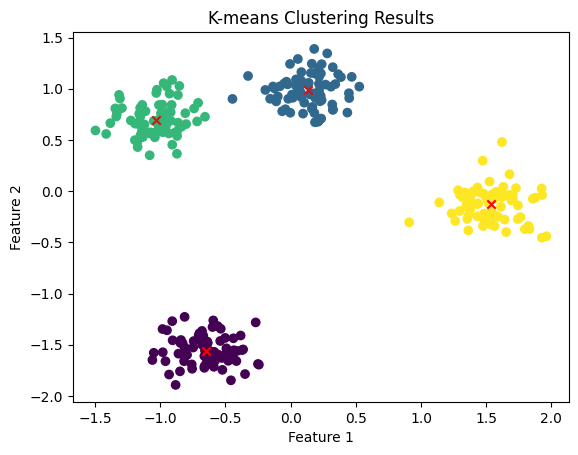

In [6]:
# Plot the dataset with the assigned clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()


**K Medoids** *using mahnattan distance*

In [7]:
def initialize_medoids(data, k):
    index=np.random.choice(len(data),k,replace=False)
    return data[index]

def compute_dissimilarities(data, medoids):
    return np.sum(np.abs((data-medoids[:,np.newaxis])),axis=2)

def assign_clusters_medoids(dissimilarities):
    return np.argmin(dissimilarities,axis=0)

def update_medoids(data, clusters, k):
    centroids=np.zeros((k,data.shape[1]))
    for i in range(k):
        pts=data[i==clusters]
        centroids[i]=pts[np.argmin(np.sum(np.sum(np.abs((pts-pts[:,np.newaxis])),axis=2),axis=1))]
    return centroids

def k_medoids(data, k, max_iterations=100):
    medoids=initialize_medoids(data,k)
    for i in range(max_iterations):
        dissimilarities=compute_dissimilarities(data,medoids)
        clusters=assign_clusters_medoids(dissimilarities)
        new_medoids=update_medoids(data,clusters,k)
        if np.all(new_medoids==medoids):
            return medoids,clusters
        medoids=new_medoids
    return medoids,clusters

In [8]:
medoids, clusters = k_medoids(data_scaled, k)
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - medoids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)

Total within-cluster sum of squares:  17.72922498907133


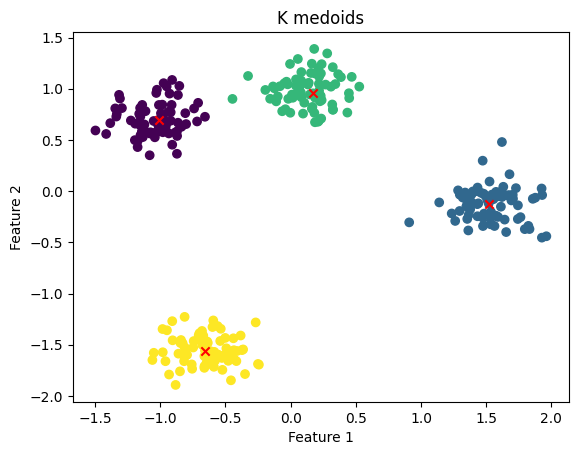

In [9]:
plt.scatter(data_scaled[:,0],data_scaled[:,1],c=clusters,cmap='viridis')
plt.scatter(medoids[:,0],medoids[:,1],c='red',marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K medoids')
plt.show()

**K Medians**

In [10]:
def initialize_medians(data, k):
    index=np.random.choice(len(data),k,replace=False)
    return data[index]
   

def compute_distance(data, medians):
    return np.sqrt(np.sum((data-medians[:,np.newaxis])**2,axis=2))

def assign_clusters_medians(distance):
    return np.argmin(distance,axis=0)
   
def update_medians(data, clusters, k):
    medians=np.zeros((k,data.shape[1]))
    for i in range(k):
        pts=data[clusters==i]
        medians[i]=np.median(pts,axis=0)
    return medians
   
def k_medians(data, k, max_iterations=100):
    medians=initialize_medians(data,k)
    for i in range(max_iterations):
        distance=compute_distance(data,medians)
        clusters=assign_clusters_medians(distance)
        new_medians=update_medians(data,clusters,k)
        if np.all(new_medians==medians):
            return medians,clusters
        medians=new_medians
    return medians,clusters
    
 

In [11]:
medians, clusters = k_medians(data_scaled, k)
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - medians[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)

Total within-cluster sum of squares:  17.67380110846033


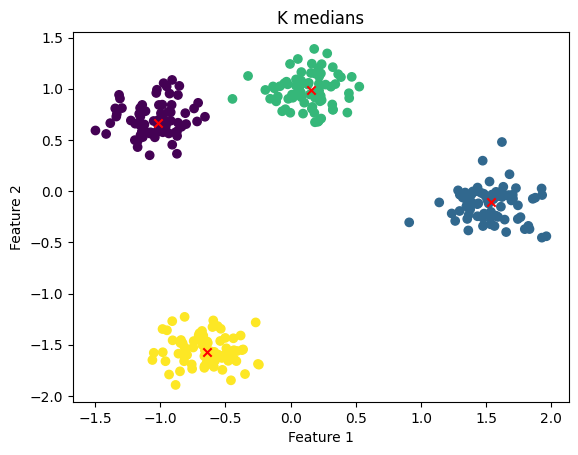

In [12]:
plt.scatter(data_scaled[:,0],data_scaled[:,1],c=clusters,cmap='viridis')
plt.scatter(medians[:,0],medians[:,1],c='red',marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K medians')
plt.show()